# Thinking with Deep Learning: Week 1 Part 2
# Introducing Deep Learning

__Instructor:__ James Evans

__Teaching Assistants & Content Creators:__ Bhargav Srinivasa Desikan, Likun Cao

This notebook will demonstrate how to whip up simple shallow and deep neural networks in both Keras and PyTorch, and how these fit into our larger machine learning pipelines. The purpose of this tutorial is to get you up and running in building a simple neural network for classification in Keras and PyTorch, two popular deep learning packages. We will focus on constructing a network, and performing inference using the network. 

### Why Keras AND PyTorch

**Keras** is a high-level package and enables rapid plug & play. It elegantly represents the building blocks of a neural network, so we will lead with it in this section. Developed by an ex-Google engineer, its emphasis is its ability to rapidly prototype neural networks while also being integrated into the second-generation Tensorflow ecosystem (described below). Unlike other packages which might have their own computational engine, Keras runs on top of others, such as Tensorflow, Theano or MXNet. While it shines in its ability deep learning newbies to start right away, it loses points for lack of low-level flexibility.

**PyTorch** offers a lower-level approach with more flexibility, surfacing more controls for the mature user. Because we focus on the representations learned during training, we prefer PyTorch because it gives us customized control over these representations… but for a simple classification task, keras can often do the trick. We will include PyTorch examples of the same network, side-by-side, to introduce its syntax. Developed by Facebook AI, PyTorch has quickly become one of the most used and supported deep learning packages, particularly by the deep learning research community for its ease of debugging and ability to easily conjure up complex models. Deep learning frameworks require a “computational engine” to function, specifically to train deep learning models. PyTorch does this with a dynamic computational graph that uses a “define-by-run” logic, which connects all parts of a neural model in terms of the data objects passed and computations done on them. You’ll see examples of this throughout.

### imports and data

For our examples, we will be using toy, generated data. This helps us in being more precise with what our models are doing. A common machine learning paradigm is classification, where we are given labelled data: an input, and an output class. We will be making such a classification dataset using scikit-learns make dataset functionality.

In [1]:
import sklearn.datasets
import sklearn.model_selection

In [2]:
X, y = sklearn.datasets.make_classification(n_samples=200, n_features=200, n_informative=100, n_classes=2, random_state=40)

In [3]:
X[0]

array([ 7.31296759e-01,  1.04648070e+00, -5.86385127e-01,  7.14070719e+00,
       -5.65820563e+00,  1.99413971e+00,  1.68286139e+00, -5.52892079e+00,
        2.83659488e-01, -2.93404746e+00,  2.21890962e+00,  1.35968068e+00,
       -2.12406830e+00, -1.15141302e+00,  6.53132992e+00,  4.74186225e+00,
        6.57086129e+00,  7.38539244e+00,  1.38481063e+00, -2.37997341e+00,
        1.94164279e+01,  1.30149743e+00,  1.41245878e+00, -3.80859071e+00,
       -7.93182295e+00,  2.39370303e-01, -2.23064264e+00, -4.41511873e-01,
       -6.43677341e-01,  4.16286528e+00, -2.08528742e+00, -8.40916021e+00,
        9.15863349e-01, -6.85482406e+00,  9.22239869e-01,  1.00510250e+00,
       -6.03262887e-01,  2.03235188e+00,  9.14696411e-01, -1.11986890e+01,
        7.60380928e-02, -5.79216355e-01,  9.14257165e+00, -9.52263612e+00,
        5.10692096e-01,  1.43878511e+00, -1.01050969e+00,  6.39494972e+00,
       -3.91744482e-01,  7.62118671e-01, -3.59734775e+00, -7.62843439e-01,
       -6.24803768e+00,  

In [4]:
y[0]

1

In [5]:
import matplotlib.pyplot as plt

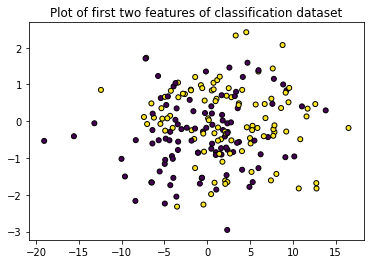

In [6]:
plt.title("Plot of first two features of classification dataset")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

Here, we generated a dataset of size 100, with 20 fearures, based on a Gaussian process where there are two 'classes'.
Our machine learning algorithm is performing well if it can correctly identify if an input belongs to the class it is labelled as.

For our models to train, it needs to be split into a training and testing dataset.

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

Let us train a simple model and see how well it does on this task. Logistic regression is a popular task for classification.

In [8]:
import sklearn.linear_model

In [9]:
logreg = sklearn.linear_model.LogisticRegression()

In [10]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
logreg.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0])

In [12]:
sklearn.metrics.accuracy_score(y_test, logreg.predict(X_test))

0.66

Not terrible, but not exactly a good accuracy score. Let's now turn to neural networks with the hope that added depth can do a better job at approximating the complext function behind the data generation process. We will be using the same dataset.

## Single layer net in Keras

We will start with Keras for building a neural network. [Keras](https://keras.io/) is a very popular choice for building neural networks which have a high level of abstraction. Keras is also tightly integrated with another popular deep learning package, Tensorflow, which is the core of its computational process. One of the big advantages of Keras is how easy it is to start building a model.

In [13]:
## Keras
import keras
import tensorflow as tf
import numpy as np

In [14]:
from keras.layers import Dense

In [15]:
from keras.models import Sequential

Keras makes creating deep learning models really easy. Here is one with only one hidden layer with 20 units, taking an input with 20 features. It uses relu activation for the first layer, which is often used for hidden layers. 

In [16]:
model = Sequential()

In [17]:
model.add(Dense(200, input_dim=200, activation='relu'))

We then use a sigmoid activation for the last layer to make its prediction, because it is a classification problem.

For more activation functions: https://keras.io/api/layers/activations/

In [18]:
model.add(Dense(1, activation='sigmoid'))

The loss is binary cross entropy which is commonly used for prediction problems, and the ADAM optimiser. 

For more losses:https://keras.io/api/losses/

For more optimisers: https://keras.io/api/optimizers/

In [19]:
model.compile(loss="binary_crossentropy", optimizer="adam")

The compile function configures the model for training, and we fit the model in the next line. The history variable stores information about the training process. 

In [20]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 3.1629
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7744
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4185
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [21]:
sklearn.metrics.accuracy_score(y_test, model.predict_classes(X_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.66

We see our model performs... just as well. Because we are not dealing with a massive dataset, logistic regression and a single layer neural network perform about just about the same. What should be noted here is how easily we could use Keras to build a single layer neural network.

### Single Layer Net in PyTorch

[PyTorch](https://pytorch.org/) is another widely used deep learning package, and one with high usage in both academia and industry. While Keras slotted in easily as an extension of the machine learning topics we saw yesterday (such as with its use of numpy, and the fit function), PyTorch runs on Tensors. Tensors are essentially a multi-dimensional matrix, and operate similarly to numpy arrays. 

In the following lines of code, we will quickly look at some basic tensor operations, such as generating an empty tensor, basic operations on tensors, and converting between numpy arrays and tensors. While you will not be tested on your ability to manipulate tensors, it is useful to know how to play with them. The final line of code in this section converts our previously used numpy based data to tensors.

In [22]:
## Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

### Tensors and Data

In [23]:
#pytorch tensors calculation
x = torch.empty(5, 3)
print(x)

tensor([[        nan,  3.0732e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  3.0732e-41],
        [ 1.1578e+27,  1.1362e+30,  7.1547e+22],
        [ 4.5828e+30,  1.2121e+04,  7.1846e+22],
        [ 9.2198e-39,  7.0374e+22, -1.6041e-09]])


torch.empty() allocates memory space for the array but does not initialize the values in this space--you get whatever uninitialized values are set to those cells in the memory!

In [24]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1036, 0.7856, 0.0675],
        [0.7736, 0.8186, 0.0680],
        [0.2869, 0.6916, 0.1617],
        [0.7750, 0.6711, 0.3318],
        [0.7833, 0.8113, 0.9255]])


torch.rand() produces random values [0,1]

In [25]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [26]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.4950, 0.5285, 0.5586],
        [0.4798, 0.7663, 0.1523],
        [0.3894, 0.0860, 0.2076],
        [0.2014, 0.7021, 0.8424],
        [0.5139, 0.5872, 0.5556]])


In [27]:
print(torch.add(x, y))

tensor([[0.4950, 0.5285, 0.5586],
        [0.4798, 0.7663, 0.1523],
        [0.3894, 0.0860, 0.2076],
        [0.2014, 0.7021, 0.8424],
        [0.5139, 0.5872, 0.5556]])


In [28]:
y.add_(x) # the `_` sign at end means the operation mutates tensor y in-place
print(y)

tensor([[0.4950, 0.5285, 0.5586],
        [0.4798, 0.7663, 0.1523],
        [0.3894, 0.0860, 0.2076],
        [0.2014, 0.7021, 0.8424],
        [0.5139, 0.5872, 0.5556]])


In [29]:
# to_remove solution
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
A = torch.add(a1 @ a2, a3)
print("A =", A)

A = tensor([[20, 24],
        [31, 27]])


In [30]:
# @ and torch.matmul return a multidimensional tensor
b1 = torch.tensor([[3], [5], [7]])
b2 = torch.tensor([[2], [4], [8]])
b = b1.T @ b2
print("b =", b)

b = tensor([[82]])


In [31]:
# dot function returns a scalar tensor
b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
b = torch.dot(b1, b2)
print("b =", b)

b = tensor(82)


We now look at converting between tensors and numpy arrays.

In [32]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [33]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [34]:
a.add_(1)
print(a)

tensor([2., 2., 2., 2., 2.])


In [35]:
print(b)

[2. 2. 2. 2. 2.]


In [36]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


We now get our training data ready.

In [71]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.reshape(torch.tensor(y_train), (150, 1))

### Constructing a Neural Network with PyTorch

PyTorch is a little more involved than Keras. We need to initialise our network with the various parts we will be using. We are using the same parameters as the Keras example. We then define what a forward pass looks like, which is kind of similar to the way we stacked networks in Keras.

[Pytorch's nn module](https://pytorch.org/docs/stable/nn.html) is the basic unit for building neural networks (or computational graphs, as it is sometimes referred to in pytroch). For example, for a hidden layer, we use the Linear layer.

In [72]:
nn.Linear(20, 20)

Linear(in_features=20, out_features=20, bias=True)

The module also includes activation functions.

In [73]:
nn.ReLU()

ReLU()

We usually encapsulate the network by defining the hidden layers and activation functions we will be needing, which you can see in the initialisation. You can then see the forward passes the input tensor through each of the operations.

In [74]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [75]:
net = Network()

We then define the optimiser and loss function.

In [76]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [77]:
criterion = nn.BCELoss()

Unlike Keras where we hit fit and the training happens, we have to define a training epoch, where we set our gradients to zero, run the test data, do a backward pass, and then update the weights. This is actually how a neural network trains, so its useful to see it broken down like this.

In [78]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients, this is the backprop step
    loss.backward()
    # (4) update weights
    opt.step()        
    losses.append(loss.data.numpy())
    return losses

In [79]:
import matplotlib.pyplot as plt

In [80]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

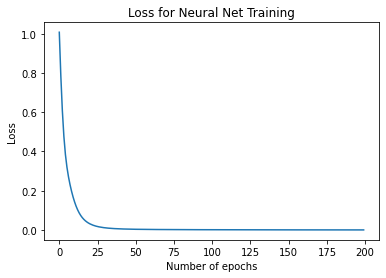

In [81]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

That little loss plot is useful for us to see how our model improves with each epoch. We did 200 epochs like the Keras example. Unlike scikit-learn or Keras objects, we don't have a predict method, but instead pass the test data directly to the net. The little function below that converts the results into a way which we can feed into a metric function.

In [82]:
output = net(torch.tensor(X_test).float())

In [83]:
output

tensor([[6.6039e-02],
        [2.0240e-01],
        [9.6134e-03],
        [8.7537e-01],
        [9.9989e-01],
        [5.9731e-01],
        [1.2085e-01],
        [5.1764e-01],
        [9.8998e-01],
        [8.7617e-05],
        [1.1820e-03],
        [2.5067e-02],
        [2.2452e-04],
        [9.9068e-01],
        [7.2257e-02],
        [8.1326e-03],
        [1.9444e-01],
        [7.6158e-01],
        [2.3040e-02],
        [3.6590e-05],
        [8.0172e-04],
        [1.4247e-02],
        [9.7754e-01],
        [2.0921e-03],
        [9.9988e-01],
        [9.9892e-01],
        [5.8637e-02],
        [9.8405e-01],
        [6.1084e-01],
        [1.8058e-04],
        [9.3799e-03],
        [2.3218e-01],
        [9.0979e-01],
        [8.9949e-01],
        [4.9341e-05],
        [9.9953e-01],
        [3.3615e-02],
        [9.5899e-02],
        [4.9837e-01],
        [8.1173e-06],
        [5.5378e-01],
        [8.4589e-03],
        [8.7580e-01],
        [9.7785e-01],
        [9.7035e-01],
        [1

In [84]:
def to_label(tensor):
    labels = []
    for val in tensor:
        if val > 0.5:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [85]:
y_pred = to_label(output)

In [86]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.72

Cool! So our PyTorch neural net did a bit better than both Keras and logistic regression. This is a demonstration of how neural networks which are similar in structure can still end up as divergently performing models because of random weights initialisation between different libraries. 

Let us now make our networks deep, and see if that helps!

### Keras Deep Net 

Making a neural net deeper simply means adding more layers or complexity. Lets add an extra layer and increase the number of units and see how it does! In the last example, we added each layer line by line. Here, we use a single list.

In [53]:
model = keras.models.Sequential([keras.layers.Dense(200, input_dim=200, activation='relu'),
                                 keras.layers.Dense(200, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [54]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [55]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 1.2295
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1262
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [56]:
sklearn.metrics.accuracy_score(y_test, model.predict_classes(X_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.72

So our deep(er) Keras model does better than the single layer Keras, and matches the PyTorch deep net.

### PyTorch deep net

Very similar to our first example, except we add an extra hidden unit layer for the tensors to go through.

In [57]:
class DeepNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        # notice how we just add another hidden unit layer
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [58]:
net = DeepNetwork()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [59]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

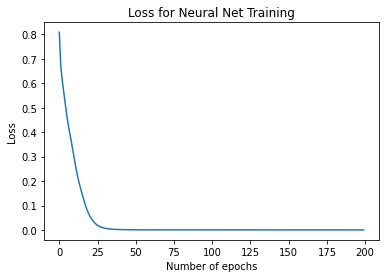

In [60]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [61]:
output = net(torch.tensor(X_test).float())

In [62]:
y_pred = to_label(output)

In [63]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.74

Adding just one layer improved model accuracies for both our Keras and PyTorch implementations!
Adding depth adds non-linearity and is able to capture more complex relations. Keras and PyTorch have different set ups and formats, and you would want to switch things around as you see fit. 

Let's try and add one more layer, and try out different optimisers and loss functions to see what happens.



In [140]:
class DeeperNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        # notice how we just add another hidden unit layer
        x = self.hidden(x)
        x = self.relu(x)
        # adding another layer
        x = self.hidden(x)
        x = self.relu(x)

        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [162]:
net = DeeperNetwork()
opt = optim.Adagrad(net.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
criterion = nn.PoissonNLLLoss()

In [163]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

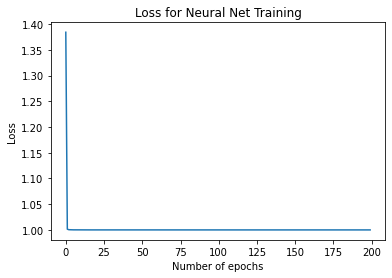

In [164]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [165]:
output = net(torch.tensor(X_test).float())

In [166]:
y_pred = to_label(output)

In [167]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.5

Uh oh - the loss function is dramatically failing, and our Poisson experiment did not end well. Which makes absolute sense, it isn't one suited for our task at hand. Let's change our loss and see if we fare better.

In [171]:
net = DeeperNetwork()
opt = optim.Adagrad(net.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
criterion = nn.BCELoss()

In [172]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

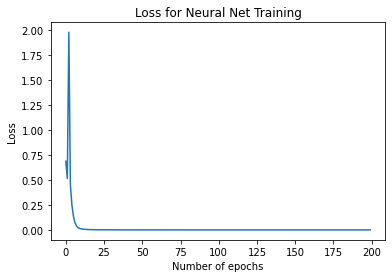

In [173]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [174]:
output = net(torch.tensor(X_test).float())

In [175]:
y_pred = to_label(output)

In [176]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.68

So the loss is suited for the task, but it seems like the extra layer and Adargrad didn't necessarily do the trick. In your homework, you will experiment similarly with archistecture design and state your results, analysis, and explanations.

## <span style="color:red">*Homework Exercise*</span>

<span style="color:red"> Similar to tutorial 1.1, your task here is to use the deep learning models we experimented with on synthetic data but instead using a real world dataset. 

Immediately below each of the following prompts, add Colab cells that:

**1)** Find and load a dataset (with more than 500 data points) into both Keras and PyTorch formats, either (a) related to your research or thesis, (b) curated from a popular data repository, or (c) associated with one of the class projects that students will undertake, which explores a social scientific area of your interest  (e.g., the dataset you used for homework 1.1). [kaggle.com](https://www.kaggle.com/datasets) is a popular website for machine learning related datasets, and you can find a good resource for social science datasets [here](https://guides.emich.edu/data/free-data).

**2)** Perform a binary classification task (e.g., predicting the presence of absence of a certain state or code) with a ReLU activation for the hidden layers and a sigmoid activation for the output layer (as demonstrated above) using Keras & Pytorch.

**2b)** Which worked better (Keras or PyTorch)?



In [64]:
winner = 'PyTorch' #@param ['Select', 'PyTorch', 'Keras']

**3)** Create an alternative network that uses a different loss function using whichever package performed better on **2b**.

**3b)** Which loss worked better?

In [65]:
bestloss = 'value' #@param {type:"string"}

**4)** Create at least 3 alternative neural networks that use a different activation function for the hidden layers (e.g., GELU, tanh, swish) using whichever package performed better on **2b**.

**4b)** Which activation worked best and what is your hypothesis as to why?

In [66]:
bestactivation = 'value' #@param {type:"string"}

**5)** Create at least 3 *deeper* network models (between 4 and 20 layers), with more layers of whatever units performed best on **4b** (still using whatever package performed best on **2b**).  

**5b)** Which depth performed best?

In [67]:
bestdepth = 0 #@param {type:"number"}

**6)** Perform a regression task on your data using a final linear unit, OR a multi-classification task using the softmax unit. You can use Keras OR PyTorch.

In [68]:
#@markdown **5b)** Briefly explain what you are predicting, why, and your interpretation of your results.
complexpredict = 'value' #@param {type:"string"}

## ***Hint***
Here is a reasonably sized dataset that we load for you (for both Keras and PyTorch). You can use it for this homework, or follow the steps to load your own for use in the machine learning tasks above.

In [69]:
#@markdown How many hours did it take you to complete this homework?
hours = 1 #@param {type:"number"}

In [70]:
#@markdown How hard was this homework?
too_easy_too_hard = 2.5 #@param {type:"slider", min:0, max:10, step:0.1}